![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 02 - Iris Classification - Solution</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/Exercise02_Classification_Solution.ipynb)

In [7]:
#-- For colab users:
#!pip install -U scikit-learn

In [8]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import matplotlib
matplotlib.rc('font', **{'size':16})

#### Load Iris data:

In [9]:
from sklearn import datasets

dIrisData        = datasets.load_iris(as_frame=True)
vY               = dIrisData['target']
dIris            = dIrisData['data']
dIris['Species'] = dIrisData['target_names'][vY]
dIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Prepare data for training:

In [10]:
mX = dIris.drop(columns='Species').values

mX.shape, vY.shape

((150, 4), (150,))

### Exercise:
* Get the best leave one out cross validation accuracy on the Iris data (KFolds = 150).
* Try the different classifiers:
    * K-NN
    * Linear SVM
    * Kernel SVM
* For each classifier, try to find the optimal set of hyper-parameters.
* Plot the confusion matrices of the optimal classifier.

### Train a linear SVM:
(Using leave one out cross-validation)

In [11]:
from sklearn.svm             import SVC
from sklearn.model_selection import cross_val_score, KFold

N = len(vY)
for C in [0.1, 1, 10, 100, 1000]:
    oSVM      = SVC(kernel='linear', C=C)
    vAccuracy = cross_val_score(oSVM, mX, vY, cv=KFold(N, shuffle=True))
    print(f'Linear SVM with C = {C:6.1f} | cross validation accuracy: {vAccuracy.mean():.4f}')

Linear SVM with C =    0.1 | cross validation accuracy: 0.9667
Linear SVM with C =    1.0 | cross validation accuracy: 0.9800
Linear SVM with C =   10.0 | cross validation accuracy: 0.9733
Linear SVM with C =  100.0 | cross validation accuracy: 0.9667
Linear SVM with C = 1000.0 | cross validation accuracy: 0.9800


### Train a kernel SVM (polynomial kernel):

In [12]:
lC   = [1, 10, 100]
lP   = range(1, 3)
dRes = pd.DataFrame(columns=['C', 'P', 'Accuracy'])

for C in lC:
    for P in lP:
        oSVM                = SVC(kernel='poly', C=C, degree=P)
        vAccuracy           = cross_val_score(oSVM, mX, vY, cv=KFold(N, shuffle=True))
        dRes.loc[len(dRes)] = [C, P, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,P,Accuracy
2,10.0,1.0,0.986667
1,1.0,2.0,0.973333
4,100.0,1.0,0.966667
5,100.0,2.0,0.966667
0,1.0,1.0,0.960000
3,10.0,2.0,0.960000


### Train a kernel SVM (Gaussian kernel):

In [13]:
lC   = [1, 10, 100, 1000, 5000]
lσ   = [0.1, 1, 10, 100]
dRes = pd.DataFrame(columns=['C', 'σ', 'Accuracy'])

for C in lC:
    for σ in lσ:
        oSVM                = SVC(kernel='rbf', C=C, gamma=1/(2*σ**2))
        vAccuracy           = cross_val_score(oSVM, mX, vY, cv=KFold(N, shuffle=True))
        dRes.loc[len(dRes)] = [C, σ, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,σ,Accuracy
19,5000.0,100.0,0.986667
10,100.0,10.0,0.980000
14,1000.0,10.0,0.973333
6,10.0,10.0,0.966667
15,1000.0,100.0,0.966667
1,1.0,1.0,0.966667
18,5000.0,10.0,0.960000
5,10.0,1.0,0.960000
9,100.0,1.0,0.953333
13,1000.0,1.0,0.913333


### Train a K-NN classifier:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

for K in range(1, 20):
    oKnn      = KNeighborsClassifier(n_neighbors=K)
    vAccuracy = cross_val_score(oKnn, mX, vY, cv=KFold(N, shuffle=True))
    print(f'K-nn with K = {K:2d} | cross validation accuracy: {vAccuracy.mean():.4f}')

K-nn with K =  1 | cross validation accuracy: 0.9600
K-nn with K =  2 | cross validation accuracy: 0.9467
K-nn with K =  3 | cross validation accuracy: 0.9600
K-nn with K =  4 | cross validation accuracy: 0.9600
K-nn with K =  5 | cross validation accuracy: 0.9667
K-nn with K =  6 | cross validation accuracy: 0.9600
K-nn with K =  7 | cross validation accuracy: 0.9667
K-nn with K =  8 | cross validation accuracy: 0.9667
K-nn with K =  9 | cross validation accuracy: 0.9667
K-nn with K = 10 | cross validation accuracy: 0.9733
K-nn with K = 11 | cross validation accuracy: 0.9733
K-nn with K = 12 | cross validation accuracy: 0.9600
K-nn with K = 13 | cross validation accuracy: 0.9667
K-nn with K = 14 | cross validation accuracy: 0.9733
K-nn with K = 15 | cross validation accuracy: 0.9733
K-nn with K = 16 | cross validation accuracy: 0.9667
K-nn with K = 17 | cross validation accuracy: 0.9733
K-nn with K = 18 | cross validation accuracy: 0.9733
K-nn with K = 19 | cross validation accuracy: 

### Confusion matrix:

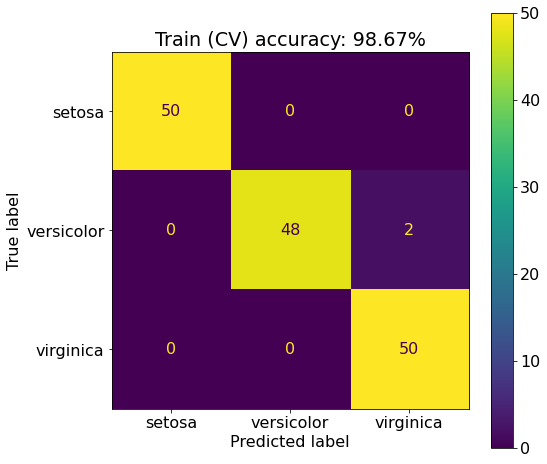

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

oSVM     = SVC(kernel='poly', C=10, degree=1)
vHatY    = cross_val_predict(oSVM, mX, vY, cv=KFold(N, shuffle=True))
accuracy = np.mean(vY == vHatY)

#-- Compute confusion matrices:
mConfusion = confusion_matrix(vY, vHatY)

_, ax = plt.subplots(1, 1, figsize=(8, 8))
ConfusionMatrixDisplay(mConfusion, display_labels=dIrisData['target_names']).plot(values_format='g', ax=ax)
ax.set_title(f'Train (CV) accuracy: {100*accuracy:2.2f}%')
plt.show()